In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Prices from Feb 13, 2025 to March 13, 2025:
         Date  Predicted Price
0  2025-02-13     96726.956339
1  2025-02-14     94181.552492
2  2025-02-15     97442.898356
3  2025-02-16     94057.500538
4  2025-02-17     92981.716143
5  2025-02-18     95337.328887
6  2025-02-19     95364.980152
7  2025-02-20     95300.890771
8  2025-02-21     95366.432825
9  2025-02-22     96288.194276
10 2025-02-23     94969.955086
11 2025-02-24     96519.675429
12 2025-02-25     95588.569069
13 2025-02-26     93309.256300
14 2025-02-27     96165.069113
15 2025-02-28     92911.212682
16 2025-03-01     91875.573470
17 2025-03-02     96089.320907
18 2025-03-03     96146.388040
19 2025-03-04     96106.964351
20 2025-03-05     96181.638773
21 2025-03-06     97089.841535
22 2025-03-07     96017.976441
23 2025-03-08     97152.972121
24 2025-03-09     96378.747741
25 2025-03-10     94317.605867
26 2025-03-11     96849.174433
27 2025-03-12     93707.220642
28 2025-03-13     92693.004439


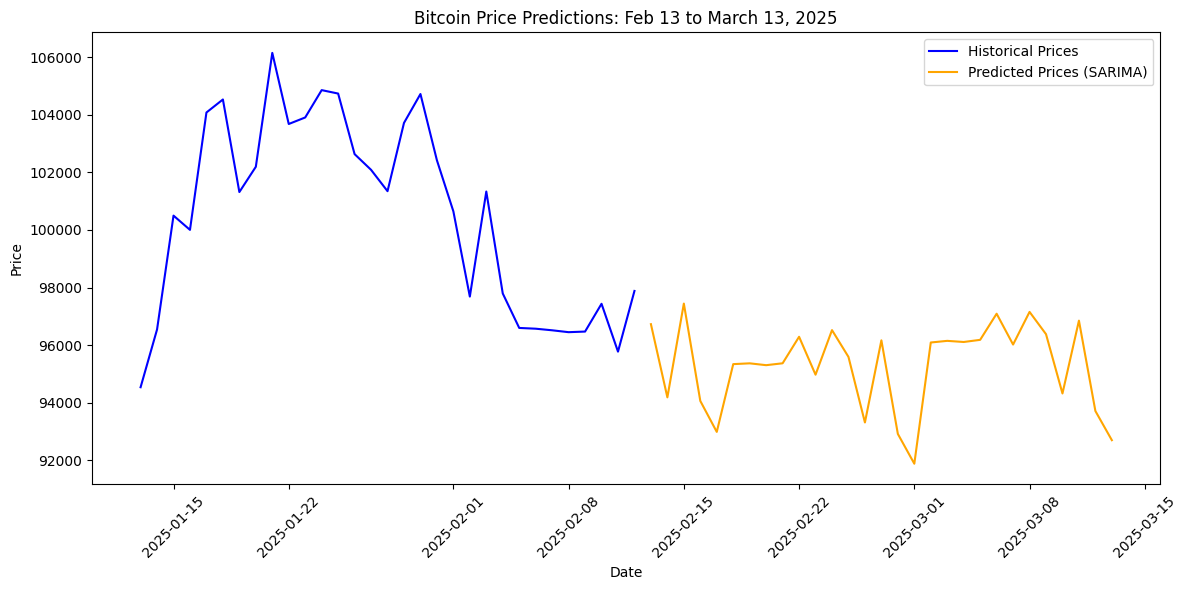

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading the dataset I downloaded on investing.com
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS 340W/Bitcoin Historical Data as on Feb 13.csv")

# Cleaning and preprocessing data
data.columns = ['date', 'price', 'open', 'high', 'low', 'volume', 'change']
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')  # Convert to datetime
data['price'] = data['price'].str.replace(',', '').astype(float)

# Sorting data by date in ascending order
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Using only the 'price' column for time-series forecasting
prices = data['price']

# Splitting dataset into training and future prediction periods sets.
train_data = prices[:'2025-02-12']  # Historical data up to January 28, 2025
future_dates = pd.date_range(start="2025-02-13", end="2025-03-13", freq='D')

# Fitting SARIMA model on training data
sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting future prices
forecast = sarima_fit.forecast(steps=len(future_dates))

# Creating a DataFrame for predicted prices with their corresponding dates
predicted_prices = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': forecast.values
})

# Printing predicted prices for each day
print("Predicted Prices from Feb 13, 2025 to March 13, 2025:")
print(predicted_prices)

# Visualization: Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(train_data.index[-100:], train_data[-100:], label='Historical Prices', color='blue')
plt.plot(future_dates, forecast, label='Predicted Prices (SARIMA)', color='orange')
plt.title('Bitcoin Price Predictions: Feb 13 to March 13, 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()